# **Examining Fatal Police Shootings: A Detailed Data Exploration**

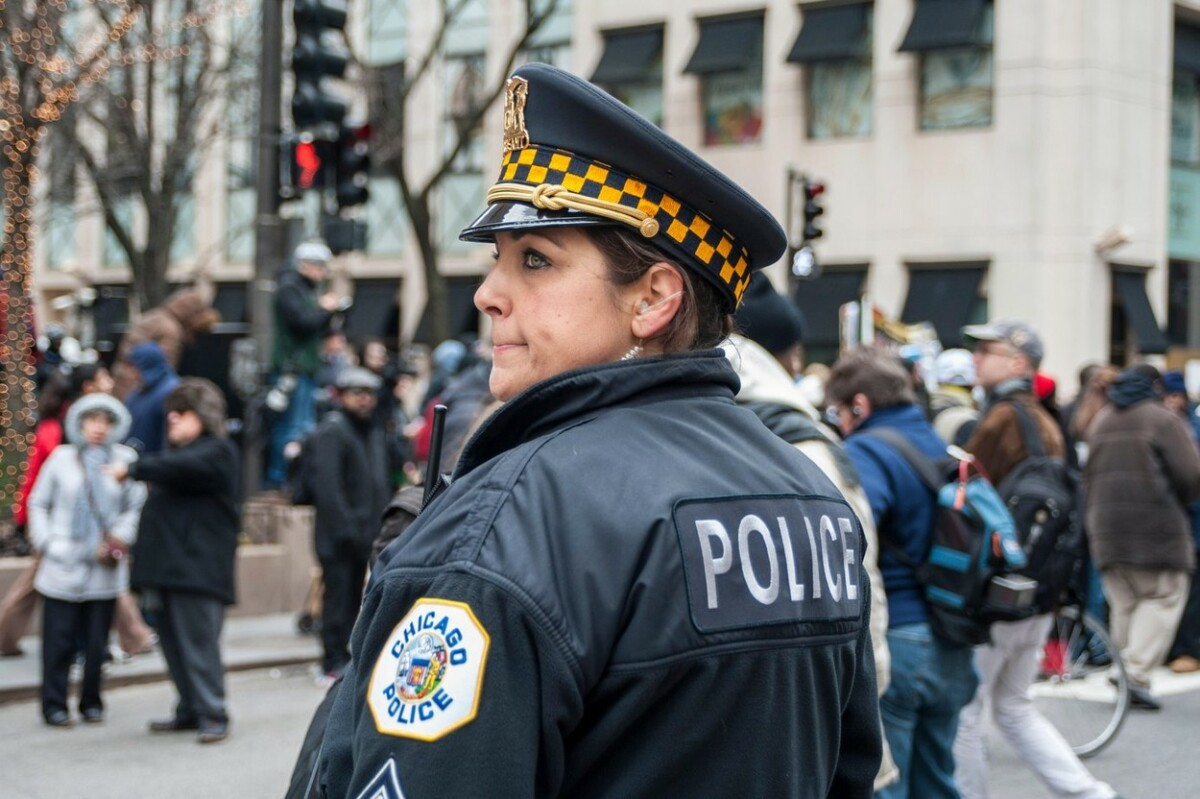

In this notebook, I will analyze a database compiled from The Washington Post, containing records of every fatal shooting in the United States by a police officer in the line of duty since Jan. 1, 2015. According to statistics, approximately 1000 people die each year in the United States as a result of police interventions. This has led to increased scrutiny of police practices and policies. <br>My objective is to examine the relationship between police homicides and various variables in the dataset in order to gain insight into the underlying factors that contribute to these incidents.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

Alongside the fatal police shootings dataset, I will also incorporate three additional datasets to gather information on city populations, the percentage of races in each city, and the percentage of people living below the poverty line

In [2]:
file1path='fatal-police-shootings-data.csv'
df=pd.read_csv(file1path)
file2path='PopulationByCity.csv'
population=pd.read_csv(file2path)
file3path='ShareRaceByCity.csv'
race_data=pd.read_csv(file3path)
file4path='PercentagePeopleBelowPovertyLevel.csv'
poverty=pd.read_csv(file4path,encoding= 'unicode_escape')

Each row of the fatal-police-shootings-data.csv file has the following variables:

- **id**: a unique identifier for each victim

- **name**: the name of the victim

- **date**: the date of the fatal shooting in YYYY-MM-DD format

- **armed_with**: indicates that the victim was armed with some sort of implement that a police officer believed could inflict harm

- **age**: the age of the victim

- **gender**: the gender of the victim. The Post identifies victims by the gender they identify with if reports indicate that it differs from their biological sex.

- **race**: [W: White, non-Hispanic; B: Black, non-Hispanic; A: Asian;
N: Native American; H: Hispanic; O: Other; None: unknown]

- **race_source**: sourcing methodology for victim race data.

- **city**: the municipality where the fatal shooting took place.

- **state**: two-letter postal code abbreviation

- **signs of mental illness**: news reports have indicated the victim had a history of mental health issues, expressed suicidal intentions or was experiencing mental distress at the time of the shooting.

- **threat_level**: the threat_level column was used to flag incidents for the story by Amy Brittain in October 2015. http://www.washingtonpost.com/sf/investigative/2015/10/24/on-duty-under-fire/ As described in the story, the general criteria for the attack label was that there was the most direct and immediate threat to life. That would include incidents where officers or others were shot at, threatened with a gun, attacked with other weapons or physical force, etc. The attack category is meant to flag the highest level of threat. The other and undetermined categories represent all remaining cases. Other includes many incidents where officers or others faced significant threats.

- **flee_status**: news reports have indicated the victim was moving away from officers by foot, car or if they didn't fleeing.

- **body_camera**: news reports have indicated an officer was wearing a body camera and it may have recorded some portion of the incident.

- **latitude and longitude**: the location of the shooting expressed as WGS84 coordinates, geocoded from addresses.
- **agency_ids**: list of agency ids associated with the death record.

In [3]:
df.head()

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,not_available,Tim Elliot,53.0,male,A,not_available,True,False,73
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,not_available,Lewis Lee Lembke,47.0,male,W,not_available,False,False,70
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,not_available,John Paul Quintero,23.0,male,H,not_available,False,False,238
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,not_available,Matthew Hoffman,32.0,male,W,not_available,True,False,196
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,not_available,Michael Rodriguez,39.0,male,H,not_available,False,False,473


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8410 entries, 0 to 8409
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          8410 non-null   int64  
 1   date                        8410 non-null   object 
 2   threat_type                 8394 non-null   object 
 3   flee_status                 7323 non-null   object 
 4   armed_with                  8200 non-null   object 
 5   city                        8386 non-null   object 
 6   county                      3556 non-null   object 
 7   state                       8410 non-null   object 
 8   latitude                    7496 non-null   float64
 9   longitude                   7496 non-null   float64
 10  location_precision          7496 non-null   object 
 11  name                        7884 non-null   object 
 12  age                         7848 non-null   float64
 13  gender                      8366 

In [5]:
df.shape

(8410, 19)

In [6]:
population.head(3)

,city,state,population,lat,lng
0,Anchor Point,AK,2057.0,59.7703,-151.7052
1,Anchorage,AK,253421.0,61.1508,-149.1091
2,Barrow,AK,4178.0,NaN,NaN


In [7]:
race_data.head(3)

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3


In [8]:
poverty.head(3)

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5


### **1. DATA SELECTION**

In the fatal police shootings dataset there are some superfluous information that I can disregard like:
- person id
- name
- race_source
- location precision
- agency ids
-  coordinate.

In [9]:
drop_list=['id','name','race_source','location_precision',
         'agency_ids','latitude','longitude' ]
for col in drop_list:
    df.drop(col,axis=1,inplace=True)

I decide to drop also:
- city
- county.

Because I want to analyze state by state and they don't provide any additional information. Furthermore county has more than 50% of missing values.

In [10]:
df.drop('city',axis=1,inplace=True)
df.drop('county',axis=1,inplace=True)

### **2. DATA CLEANING**

##### **2.1. FILL MISSING VALUES**

In [11]:
pd.DataFrame([df.isna().sum(),df.isna().sum()*100/len(df)],
             index=['Missing','% Missing']).T.round(2)

,Missing,% Missing
date,0.0,0.00
threat_type,16.0,0.19
flee_status,1087.0,12.93
armed_with,210.0,2.50
state,0.0,0.00
age,562.0,6.68
gender,44.0,0.52
race,1221.0,14.52
was_mental_illness_related,0.0,0.00
body_camera,0.0,0.00


In [12]:
#variables type
cat_cols=[col for col in df.columns if df[col].dtype == 'object'
         or df[col].dtype == 'bool'
         or df[col].dtype == 'category']
num_cols=[col for col in df.columns if df[col].dtype == 'int64'
          or df[col].dtype == 'float64']
print('Categoricals_columns:',cat_cols)
print('Numericals_columns:',num_cols)

Categoricals_columns: ['date', 'threat_type', 'flee_status', 'armed_with', 'state', 'gender', 'race', 'was_mental_illness_related', 'body_camera']
Numericals_columns: ['age']


In [13]:
#The percentage of missing values in age is quiet low (under 10%, that we can consider the theshold).
#so, I'll replace the missing values with the median of Age.
df['age'].fillna(df.age.median(),inplace=True)

In [14]:
#Race has more than 14% of missing values.
#Before fill them I want to understand how is the distribution of races in every state.
#To do that I'll use the race dataset that give us the percentage of races in every city.

#transformation of percentage columns in float.
for i in race_data.columns[2::]:
    race_data[i]=pd.to_numeric(race_data[i],errors='coerce')

race_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        29268 non-null  object 
 1   City                   29268 non-null  object 
 2   share_white            29248 non-null  float64
 3   share_black            29248 non-null  float64
 4   share_native_american  29248 non-null  float64
 5   share_asian            29248 non-null  float64
 6   share_hispanic         29248 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


In [15]:
#the number of missing values is low so I decide to drop them
race_data.dropna(inplace=True)

In [16]:
a=race_data.groupby('Geographic area')['share_white'].mean()
b=race_data.groupby('Geographic area')['share_black'].mean()
c=race_data.groupby('Geographic area')['share_native_american'].mean()
d=race_data.groupby('Geographic area')['share_asian'].mean()
e=race_data.groupby('Geographic area')['share_hispanic'].mean()
race_states=pd.DataFrame([a,b,c,d,e]).T
race_states.head()

,share_white,share_black,share_native_american,share_asian,share_hispanic
Geographic area,,,,,
AK,45.650000,0.567330,45.864773,1.388352,2.149148
AL,72.507266,23.322318,0.659343,0.479758,2.980104
AR,78.449538,16.296858,0.759889,0.477079,4.273013
AZ,59.929047,0.954545,28.589800,0.726608,20.144568
CA,71.866293,2.692018,1.723087,5.568206,29.649868


As we can see, in the majority of states the most common race is 'white', follow by black. In some sud states like California or Arizona there are a big percentage of hispanic, while the native americans are more common in the center of Usa but also Alaska.
Now I want to see if there are some states where the white race is not predominant.

In [17]:
race_states[race_states['share_black']> race_states['share_white']]

,share_white,share_black,share_native_american,share_asian,share_hispanic
Geographic area,,,,,
DC,38.5,50.7,0.3,3.5,9.1


In [18]:
race_states[race_states['share_native_american']> race_states['share_white']]

,share_white,share_black,share_native_american,share_asian,share_hispanic
Geographic area,,,,,
AK,45.65,0.56733,45.864773,1.388352,2.149148


It seems that in Washington DC there are more black people than white, and also in Alaska for native americans.

In [19]:
index_df1=pd.DataFrame([df.race.isna()[df['state']=='AK']]).T
#seeking for murders in Alaska where the race is not reported
index1=index_df1[index_df1['race']==True].index
#index of cells that contain nan
for i in index1:
    df.at[i,'race']='N'

In [20]:
index_df2=pd.DataFrame([df.race.isna()[df['state']=='DC']]).T#seeking for murders in Washington DC where the race is not reported
index2=index_df2[index_df2['race']==True].index
for i in index2:
    df.at[i,'race']='B'

In [21]:
#In the rest of the states I replace the missing values with W.
df['race'].fillna('W',inplace=True)

In [22]:
#For the rest of the categorical columns I'll replace them with the mode of the features.
for col in cat_cols:
    df[col].fillna(df[col].mode()[0],inplace=True)

###### **2.2. DROP DUPLICATED VALUES**

In [23]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

#### **3. DATA TRANSFORMATION**

In [24]:
df.race.value_counts()

W      4890
B      1939
H      1296
A       143
N       118
O        20
B;H       1
Name: race, dtype: int64

In [25]:
# To simplify I'll replace the only value that has double race.
df['race']=df['race'].replace(['B;H'],['B'])

In [26]:
#Transformation of object date in datetime dtype
df['date']=pd.to_datetime(df['date'])

In [27]:
#Transformation of boolean value in int64. So I can work with them.
df['was_mental_illness_related']=df['was_mental_illness_related'].astype('int64')
df['body_camera']=df['body_camera'].astype('int64')

In [28]:
df['armed_with'].value_counts()

gun                          5067
knife                        1423
unarmed                       492
undetermined                  316
vehicle                       298
replica                       282
blunt_object                  207
unknown                       134
other                          86
gun;vehicle                    37
gun;knife                      34
vehicle;gun                    15
other;gun                       3
knife;vehicle                   3
blunt_object;knife              2
blunt_object;blunt_object       2
knife;blunt_object              2
replica;vehicle                 1
vehicle;knife;other             1
replica;knife                   1
other;blunt_object;knife        1
Name: armed_with, dtype: int64

To avoid too many groups that don't give any plus information
 in the case that there are two or more weapons involved, I
replace that group with the group of the weapon more dangerous.
So in order:
- 1) gun
- 2) knife
- 3) blunt_object
- 4) replica
- 5) vehicle
- 6) other

I consider 'replica' (a toy weapon), very dangerous because sometimes it's difficult for police understand if the weapon is real or false.

In [29]:
df['armed_with']=df['armed_with'].replace(['gun;vehicle','gun;knife',
                                          'vehicle;gun', 'other;gun',
                                          'knife;vehicle', 'blunt_object;knife',
                                          'blunt_object;blunt_object',
                                           'knife;blunt_object',
                                           'replica;vehicle','vehicle;knife;other',
                                          'replica;knife','other;blunt_object;knife'],
                                          ['gun','gun','gun','gun',
                                           'knife','knife','blunt_object',
                                           'knife','replica','knife','replica',
                                                                        'knife'])

In [30]:
# Replacing some of race abbreviations to full form
race_mapping = {'W': 'White', 'B': 'Black', 'H': 'Hispanic', 'A': 'Asian', 'N': 'Native American', 'O': 'Other'}

df['race'] = df['race'].replace(race_mapping)
#Rename of the column with a short name
df.rename(columns={'was_mental_illness_related': 'mental_illness'},inplace=True)

#### **4. OPERATIONS IN POVERTY DATASET**

In [31]:
poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [32]:
#transform poverty rate in float number
poverty.poverty_rate=pd.to_numeric(poverty.poverty_rate,
                                   errors='coerce')
p_rate=pd.DataFrame(poverty.groupby('Geographic Area')['poverty_rate'].mean())
p_rate.head(3)

,poverty_rate
Geographic Area,
AK,19.852994
AL,20.647089
AR,22.963216


#### **5. DATA VISUALIZATION**

Text(0.5, 1.0, 'Number of murders per year')

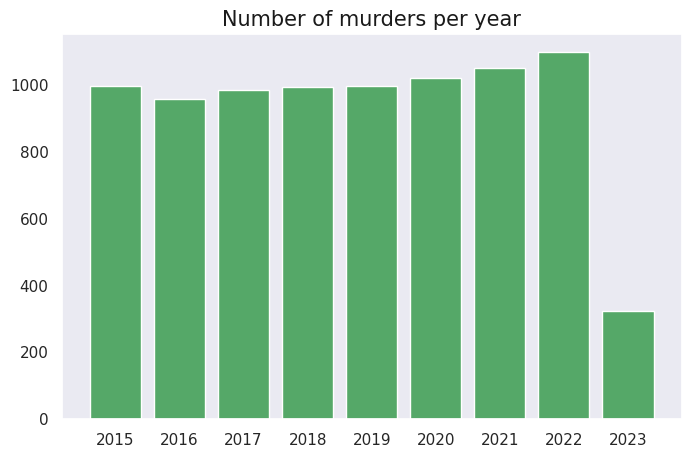

In [33]:
#Number of murders per year
def date_count(x):
    return df[df.date.dt.year==x].shape[0]
count_date=[]
for i in [2015,2016,2017,2018,2019,2020,2021,2022,2023]:
    count_date.append(date_count(i))
plt.figure(figsize=(8,5))
sns.set(style="dark")
plt.bar(x=['2015','2016','2017','2018','2019','2020','2021','2022','2023'],
        height=count_date,color='g')
plt.title('Number of murders per year',fontsize=15,color='k')


Since 2016 the number of murders increase a little bit every year, around an average of 1000, except the 2023 because we are in April and it's not finished yet.

Text(0.5, 1.0, 'Murders distribution in states')

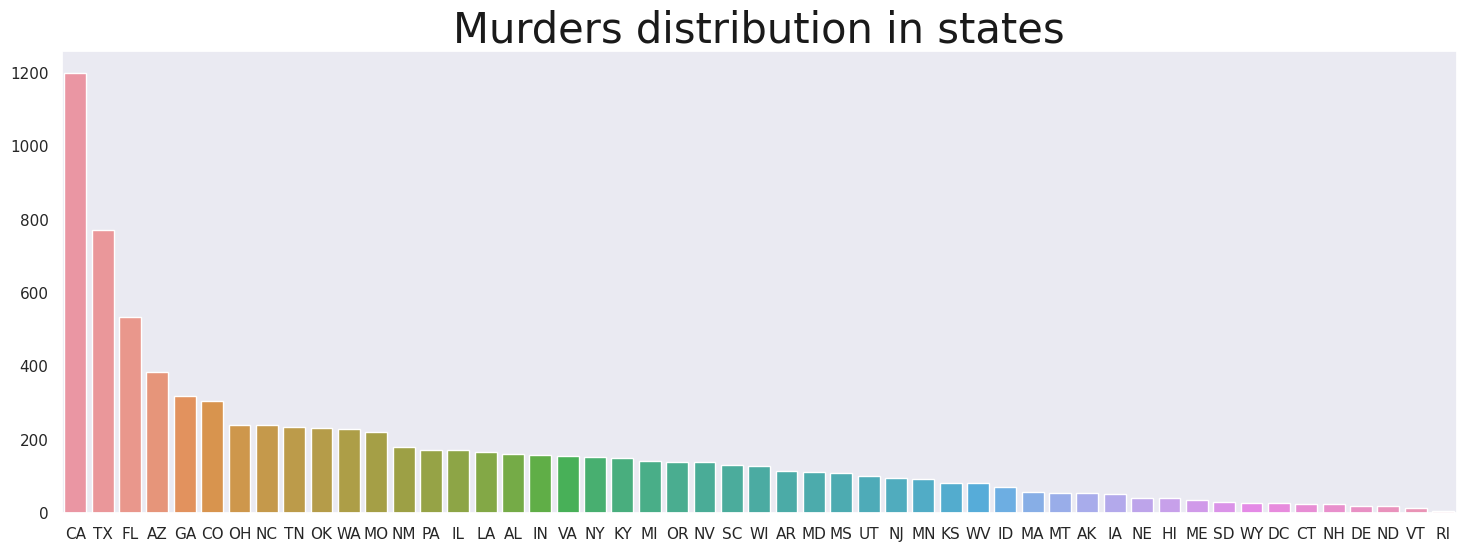

In [34]:
sns.set(style="dark")
plt.figure(figsize=(18,6))
a=df['state'].value_counts()
sns.barplot(x=a.index,y=a.values)
plt.title('Murders distribution in states',fontsize=30,color='k')

The state where there was the majority of cases is California, followed by Texas and Florida.
Nonetheless we have to consider that these states are some of the most populated. So we have to use a more accurated indicators like the number of cases per inhabitans.

In [35]:
#Number of cases for state
states_count=pd.DataFrame({'cases':df.state.value_counts(),'state': df.state.value_counts().index})
#Count the number of population for every state from the population dataset
population.groupby(['state'])['population'].sum()
#Creation of state-population dataframe
n_pop=pd.DataFrame({'pop':population.groupby(['state'])['population'].sum()})
#Order from state
states_count=states_count.sort_values(by=['state'])
#Creation of new dataframe that contain the population, the number of cases,
# and the percentage of cases per 1000 inhabitans
states_cases_per_population=pd.concat([n_pop,states_count],axis=1)
states_cases_per_population['cases_per_1000_inhabitans']=(states_cases_per_population['cases']/ (states_cases_per_population['pop']/1000)).round(2)

In [36]:
states_cases_per_population.head()

,pop,cases,state,cases_per_1000_inhabitans
AK,387478.0,54,AK,0.14
AL,2750534.0,160,AL,0.06
AR,1616531.0,115,AR,0.07
AZ,8250903.0,384,AZ,0.05
CA,49249138.0,1198,CA,0.02


In [37]:
fig = px.choropleth(states_cases_per_population,
                    locations='state',
                    locationmode="USA-states",
                    scope="usa",
                    color='cases_per_1000_inhabitans',
                    color_continuous_scale="reds")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show(figsize=(8,8))

So, we can see that the states where it's more probable to be killed by police are Alaska, Montana and Wyoming with 0.12-0.14 cases per thousand inhabitans. On the other hand in states like New York, Massachussets and Rhode Island the situation seems to be more calm.

**How poverty affects the number of cases?**

In [38]:
cases_poverty=pd.merge(left=states_cases_per_population,right=p_rate,
           left_on="state", right_on='Geographic Area', how='outer')
cases_poverty.head(3)

,pop,cases,state,cases_per_1000_inhabitans,poverty_rate
0,387478.0,54,AK,0.14,19.852994
1,2750534.0,160,AL,0.06,20.647089
2,1616531.0,115,AR,0.07,22.963216


Text(0.5, 1.0, 'Relationship between poverty rate and percentage of cases')

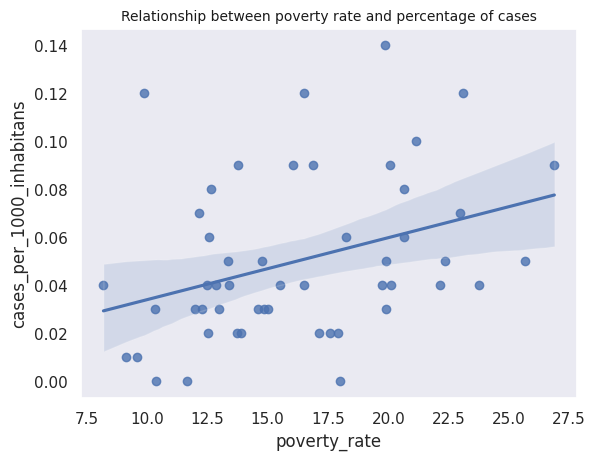

In [39]:
sns.set(style="dark")
sns.regplot(data=cases_poverty,x='poverty_rate',y='cases_per_1000_inhabitans')
plt.title('Relationship between poverty rate and percentage of cases',color='k',fontsize=(10))

Even tought there are many outliers, we can see a linear relationship between the poverty rate and the % of cases. It was what I expected because where there is more poverty there is more criminality so the probability of having a murder is greater.

Text(0.5, 1.0, ' % Gender of victims')

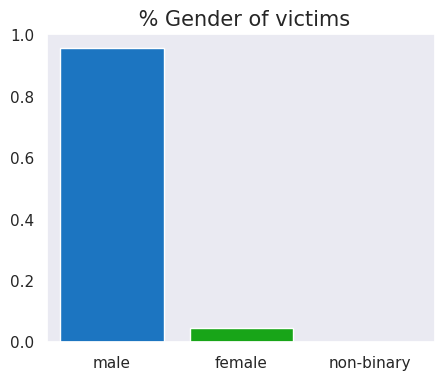

In [40]:
#util function to use percentage
def perc(x):
    return x.value_counts()/len(x)


fig,ax=plt.subplots(figsize=(5,4))
sns.set(style="dark")
sns.barplot(x=perc(df['gender']).index,y=perc(df['gender']).values,palette="nipy_spectral")
ax.set_title(' % Gender of victims',fontsize=15)

Text(0.5, 1.0, 'Distribution of age in victim')

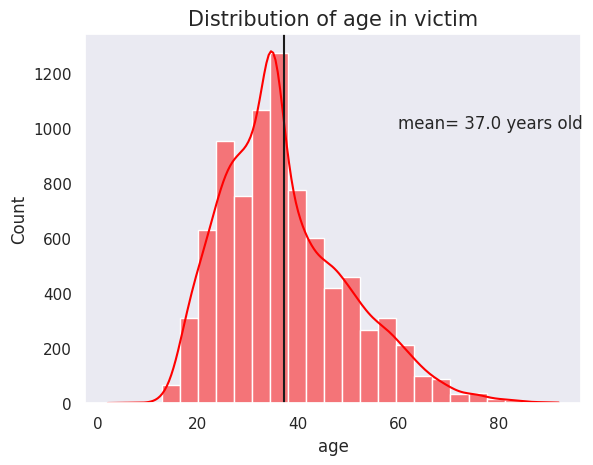

In [41]:
sns.set(style="dark")
sns.histplot(data=df,x='age',bins=25,kde='True',color='red')
plt.axvline(x=df.age.mean(),color='k')
plt.text(60,1000,'mean= {} years old'.format(df.age.mean().round(0)))
plt.title('Distribution of age in victim',fontsize=15)

So the mean person to be killed by police is a men between 35 and 40 years old.

Text(0.5, 1.0, '% Signs of mental illnes')

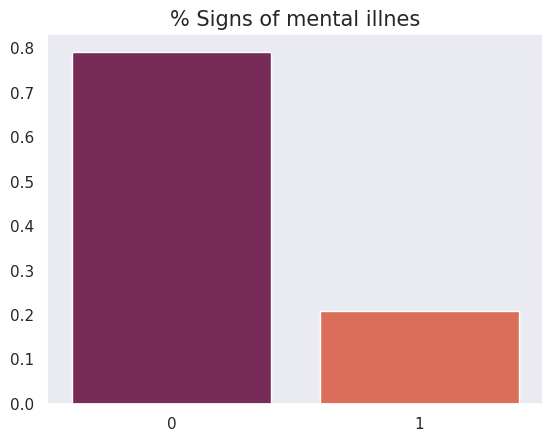

In [42]:
sns.set(style='dark')
sns.barplot(x=perc(df['mental_illness']).index,y=perc(df['mental_illness']).values,palette="rocket")
plt.title('% Signs of mental illnes',fontsize=15)

Only in the 20% of cases the victim had a history of mental health issues.

**Was the person killed armed? What kind of action lead up to the fatal shooting?**

In [43]:
#define a function that allow me to divide people that was armed and people
#that wasn't armed (I consider a toy weapon like a real weapon)
def arm(x):
    if (x== 'unarmed')| (x=='vehicle'):
        return 'unarmed'
    else:
        return 'armed'
armed_or_not=df['armed_with'].apply(arm).value_counts(normalize=True)
fig = px.pie(values = armed_or_not.values, names = armed_or_not.index, title='Armed or unarmed (%)')
fig.update(layout=dict(title=dict(x=0.5),autosize=False, width=400, height=400))
fig.show()

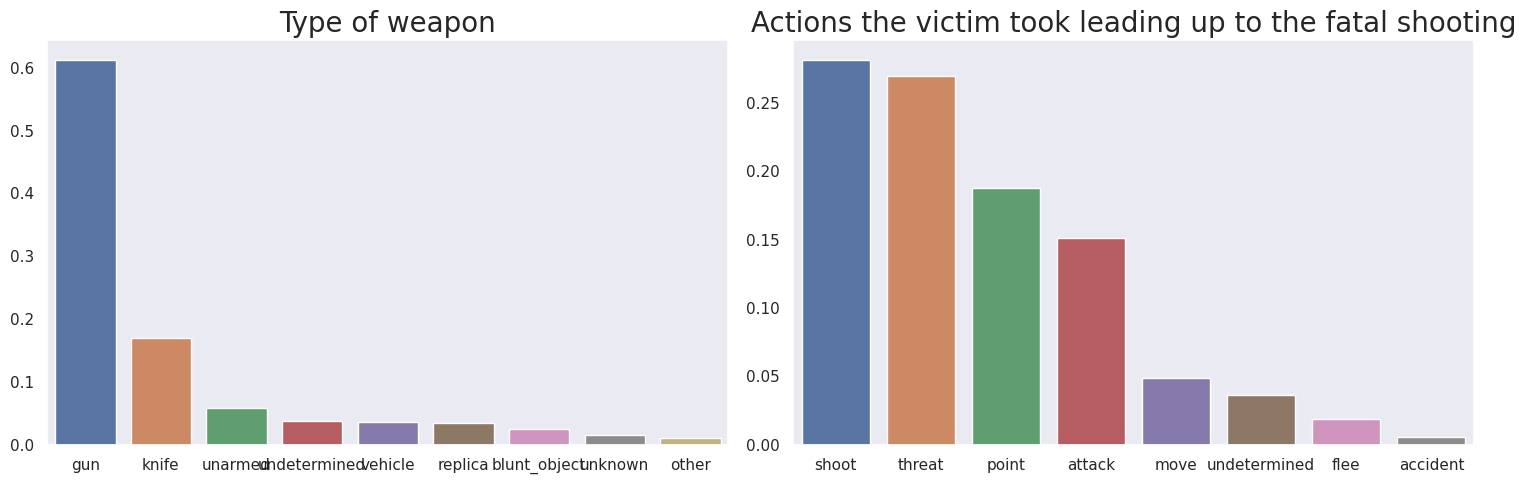

In [44]:
sns.set(style='dark')
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0]=sns.barplot(x=perc(df.armed_with).index,y=perc(df.armed_with).values,ax=ax[0])
ax[0].set_title('Type of weapon',fontsize=20)
ax[1]=sns.barplot(x=perc(df.threat_type).index,y=perc(df.threat_type).values,ax=ax[1])
ax[1].set_title('Actions the victim took leading up to the fatal shooting',fontsize=20)
fig.tight_layout()

According to the data 90% of people killed was armed. Up to 60% has a gun and more than 50% of them was shooting, pointing or attacking the police officer.


**Number of people killed as a proportion of respective races**


If we saw to the number of people killed by race during this 8 years, we would see that the white people was at the first place.
However we have to consider, as we did when we analized the percentage of cases per state, the percentage of every single race in the population.

At this link there are dates that we'll use: https://data.census.gov/cedsci/table?q=Hispanic%20or%20Latino&tid=ACSDP1Y2019.DP05&hidePreview=false

In [45]:
#dataframe with race percentage
p=pd.Series([60.0,12.4, 0.9, 5.6, 18.4, 2.7],index=['White','Black','Native American','Asian','Hispanic','Other'])

count=df.race.value_counts(normalize=True)
count=count.sort_values(ascending=False)
print(count)

White              0.581658
Black              0.230760
Hispanic           0.154157
Asian              0.017010
Native American    0.014036
Other              0.002379
Name: race, dtype: float64


Text(0.5, 0, 'Races')

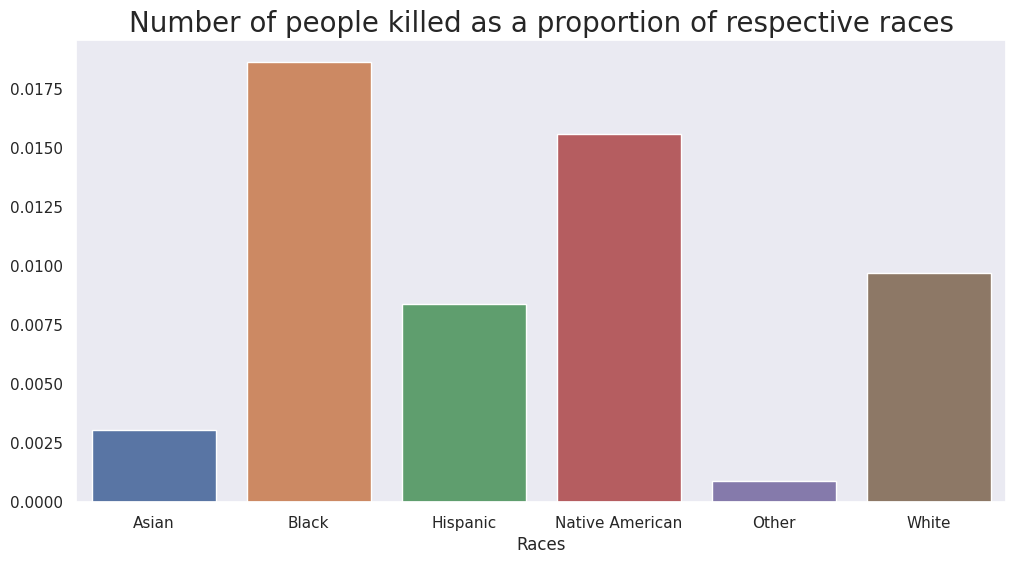

In [46]:
count_races=count/p

plt.subplots(figsize=(12,6))
sns.set(style='dark')
sns.barplot(y=count_races.values,x=count_races.index)
plt.title('Number of people killed as a proportion of respective races',fontsize=20)
plt.xlabel('Races')

Earlier, when we looked at the percentage of people killed, we saw that the percentage of white people killed was 2 times the black people and 50 times the native americans. However, if you look at the numbers as the proportion of the racial population, Blacks are approximately 2 times as likely to be killed by police than Whites, and also Native Americans is more likely to be killed.

#### **6. CONCLUSION**

Based on the visualization of the data, it appears that the number of fatal police shootings hovers around a thousand per year, with certain states experiencing higher incident rates. Moreover, the data suggests that young men are more susceptible to such incidents, while mental illness does not seem to be a significant contributing factor. An analysis of the percentage of races in America reveals that Black people and Native Americans are more likely to be killed by police.

However, it is important to note that many cases involve the victim being in possession of a weapon, and in some instances, police officers may find themselves under attack, which can influence their actions.

While it is crucial to condemn cases of police brutality, it is equally important to recognize that police officers have a duty to ensure their own safety and the safety of others. Consequently, scenarios like this may unfortunately occur.